## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
whole_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
whole_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
n_of_mice=whole_data["Mouse ID"].unique()
n_of_mice=len(n_of_mice)
n_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df=pd.DataFrame(whole_data.duplicated(subset=["Mouse ID","Timepoint"]), columns=["Label"])
dup_index=dup_df.loc[dup_df["Label"]==True]
dup_list=dup_index.index
dup_list
dup_id=whole_data.loc[dup_list,["Mouse ID"]]
dup_id


,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# LIST OF DUPLICATES ONLY
whole_data.loc[dup_list]
# LIST OF ALL DATA FOR DUPLICATE MOUSE
g989_df=whole_data.loc[whole_data["Mouse ID"]=="g989"]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=whole_data.drop(g989_df.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
n_of_mice=clean_df["Mouse ID"].unique()
n_of_mice=len(n_of_mice)
n_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
group_by_drug=clean_df.groupby("Drug Regimen")
summ_stat=pd.DataFrame({"Tumor Volume Mean":group_by_drug["Tumor Volume (mm3)"].mean(),
                       "Tumor Volume Median":group_by_drug["Tumor Volume (mm3)"].median(),
                       "Tumor Volume Variance":group_by_drug["Tumor Volume (mm3)"].var(),
                       "Tumor Volume StD":group_by_drug["Tumor Volume (mm3)"].std(),
                       "Tumor Volume SEM":group_by_drug["Tumor Volume (mm3)"].sem()})
summ_stat


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summ_stats_2=pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]))
summ_stats_2.columns=["Tumor Volume Mean","Tumor Volume Median","Tumor Volume Variance","Tumor Volume StD","Tumor Volume SEM"]
summ_stats_2

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Amount of Mice per Drug'}, xlabel='Drug Regimen', ylabel='Amount of Mice'>

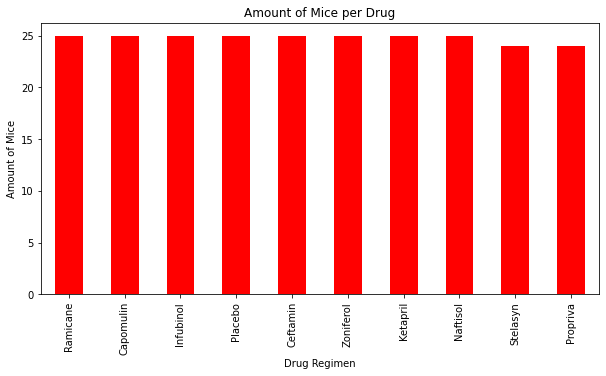

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_chart=pd.DataFrame(clean_df.drop_duplicates(subset="Mouse ID"))
bar_chart=pd.DataFrame(bar_chart["Drug Regimen"].value_counts())


bar_chart.plot(kind="bar", figsize=(10,5), color="r", legend=False, title="Amount of Mice per Drug", xlabel="Drug Regimen", ylabel="Amount of Mice")



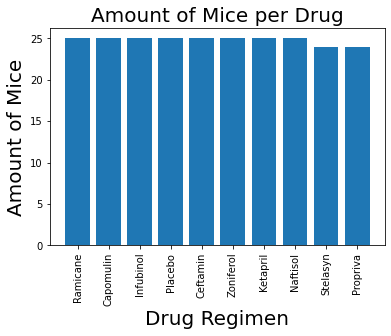

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(bar_chart.index,bar_chart["Drug Regimen"])
plt.title("Amount of Mice per Drug",fontsize=20)
plt.xlabel("Drug Regimen",fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Amount of Mice",fontsize=20)
plt.show()



<AxesSubplot:title={'center':'Percent of Mice Per Gender'}>

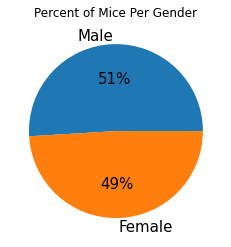

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart=clean_df["Sex"].value_counts()
pie_chart.plot(kind="pie",title="Percent of Mice Per Gender", ylabel="", fontsize=15, autopct='%1.0f%%')



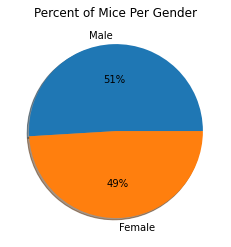

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart, labels=pie_chart.keys(),autopct='%1.0f%%', shadow=True)
plt.title("Percent of Mice Per Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor=pd.DataFrame(clean_df.groupby(["Mouse ID"])["Timepoint"].max())
max_tumor.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df=pd.merge(max_tumor,clean_df,on=["Mouse ID","Timepoint"])
df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    final_tumor_list= df.loc[df["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_list)

    
    # Determine outliers using upper and lower bounds
    quantiles=final_tumor_list.quantile([0.25,0.5,0.75])
    lowerq=quantiles[0.25]
    upperq=quantiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    outliers = final_tumor_list.loc[(final_tumor_list > upper_bound) | (final_tumor_list < lower_bound) ]
    
  
    print(f"{drug} potential outliers: {outliers}")



    


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

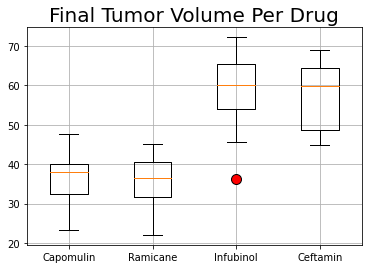

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flier=dict(markerfacecolor="red", markersize=10)
plt.boxplot(tumor_vol_data, labels=drugs, flierprops=flier)
plt.title("Final Tumor Volume Per Drug", fontsize=20)
plt.grid()
plt.show


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time')

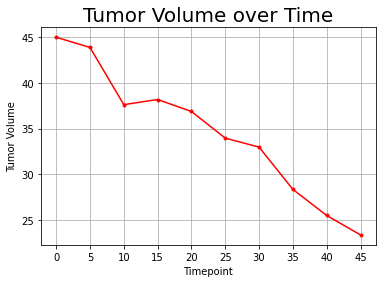

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capo_mouse=capomulin_data.loc[capomulin_data["Mouse ID"]==(capomulin_data.iloc[0,0])]
x_axis=capo_mouse["Timepoint"]
y_axis=capo_mouse["Tumor Volume (mm3)"]
tick_locations= [x for x in x_axis]
plt.plot(x_axis,y_axis, ".-r")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.xticks(tick_locations)
plt.grid()
plt.title("Tumor Volume over Time", fontsize=20)

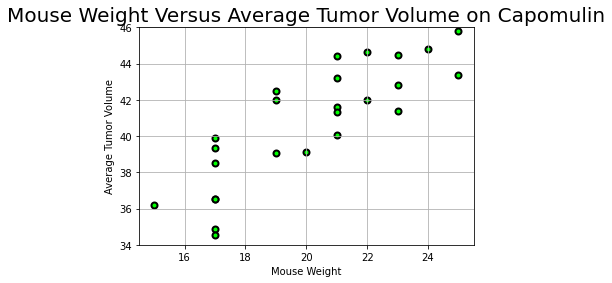

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data=capomulin_data.groupby("Mouse ID").mean()
x_axis=scatter_data["Weight (g)"]
y_axis=scatter_data["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis,facecolor="lime",edgecolor="black", linewidths=2)
plt.title("Mouse Weight Versus Average Tumor Volume on Capomulin", fontsize=20)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.grid()
plt.ylim(34,46)
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis=scatter_data["Weight (g)"]
y_axis=scatter_data["Tumor Volume (mm3)"]

print(f"The correlation coeficient for mouse weight and average tumor volume for the Capomulin regimen is: {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The linear regression model for mouse weight and average tumor volume for the Capomulin regimen is: {st.linregress(x_axis,y_axis)}")


The correlation coeficient for mouse weight and average tumor volume for the Capomulin regimen is: 0.84
The linear regression model for mouse weight and average tumor volume for the Capomulin regimen is: LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)
